In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('imdb.txt', sep ="\t", header=None)
df.columns = ['message','good']
df = df.replace(0,'bad').replace(1,'good')

In [3]:
keywords = ['slow', 'flat', 'disappointed', 'poor', 'crap', 'bad',
            'doomed', 'boring', 'no plot', 'awful', 'sucked', 'horrible', 'terrible']

for key in keywords:
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

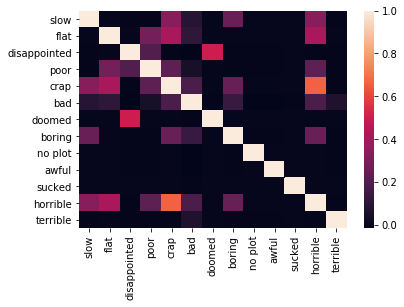

In [4]:
sns.heatmap(df.corr())

In [5]:
df['good'] = (df['good'] == 'good')

In [6]:
data = df[keywords]
target = df['good']

In [9]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of bad reviews out of a total of {} reviews: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of bad reviews out of a total of 748 reviews: 313


feature engineering/selection process was done manually. I skimmed through the reviews and looked at words/phrases that were unique to bad reviews.